In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import pickle

import matplotlib.pyplot as plt

import fnmatch

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Number of Files in my subdirectories 

# print (len(fnmatch.filter(os.listdir('./images/train/ring/'), '*.png')))

In [3]:
# print (len(fnmatch.filter(os.listdir('./images/train/not_ring/'), '*.png')))

In [4]:
num_samp_train = 875
num_samp_test = 292
batch_size = 32

#Augment Fixed or Forever? 

#Instantiate 
train_datagen = ImageDataGenerator(rotation_range = 30,
                                   rescale=1./255)
                                   
test_datagen = ImageDataGenerator(rotation_range=30,
                                  rescale=1./255)

#Fit that class...
train_generator = train_datagen.flow_from_directory(directory='../organic_classification/images_binary/train/',
                                                        target_size=(300, 300),
                                                        color_mode="grayscale",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        save_to_dir = '/Users/patrickcavins/Desktop/augment/',
                                                        save_format = '.png',
                                                        class_mode="binary")


Found 875 images belonging to 2 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory(directory='../organic_classification/images_binary/test/',
                                                        target_size=(300, 300),
                                                        color_mode="grayscale",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        save_to_dir = '/Users/patrickcavins/Desktop/augment/',
                                                        save_format = '.png',
                                                        class_mode="binary")

Found 292 images belonging to 2 classes.


In [6]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (3, 3), input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #should I increase? It should learn more complicated relations 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #Same thing here... maybe 32,64, 128... 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # 50% 
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#Summary 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 128)     1280      
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      73792     
_________________________________________________________________
activation_2 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        36928     
__________

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_generator, steps_per_epoch= 10, 
                              epochs=30, validation_data=validation_generator, 
                                  validation_steps = 10
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
10/10 [==============================] - 92s 9s/step - loss: 0.8131 - acc: 0.5563 - val_loss: 0.6707 - val_acc: 0.6233
Epoch 2/30
10/10 [==============================] - 89s 9s/step - loss: 0.6836 - acc: 0.6063 - val_loss: 0.6803 - val_acc: 0.6233
Epoch 3/30
10/10 [==============================] - 94s 9s/step - loss: 0.6686 - acc: 0.6175 - val_loss: 0.6617 - val_acc: 0.6233
Epoch 4/30
10/10 [==============================] - 118s 12s/step - loss: 0.6960 - acc: 0.5094 - val_loss: 0.6739 - val_acc: 0.6233
Epoch 5/30
10/10 [==============================] - 153s 15s/step - loss: 0.6709 - acc: 0.6406 - val_loss: 0.6587 - val_acc: 0.6233
Epoch 6/30
10/10 [==============================] - 124s 12s/step - loss: 0.6637 - acc: 0.6089 - val_loss: 0.6386 - val_acc: 0.6233
Epoch 7/30
10/10 [==============================] - 122s 12s/step - loss: 0.6209 - acc: 0.6312 - val_loss: 0.5688 - val_acc: 0.6233
Epoch 8/30
10/10 [================

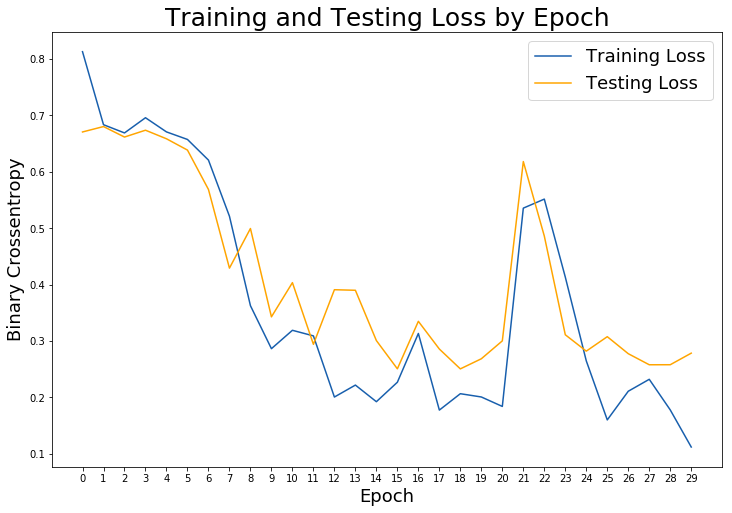

In [11]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(30))

plt.legend(fontsize = 18);

In [13]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)

10/10 [==============================] - 22s 2s/step


In [14]:
labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

loss: 0.23773266931306825
acc: 0.9212328767123288


In [16]:
preds  = model.predict_generator(validation_generator, steps=10, verbose=1)

10/10 [==============================] - 20s 2s/step


In [17]:
## pickle / look @ keras in house for saving the data 

pred_class = (preds >= .5).astype(int)

In [18]:
# pred_class

In [19]:
# # Using Pickle 

# pickle.dump( preds, open( "./data/preds_binary_10epoch.p", "wb" ))
# pickle.dump( pred_class, open("./data/pred_class_label_10epoch.p", "wb"))

In [20]:


x  = pickle.load(open('./data/preds_binary_10epoch.p', 'rb'))

print (x)

[[0.3905711 ]
 [0.41221175]
 [0.3878985 ]
 [0.40231332]
 [0.4011212 ]
 [0.40650615]
 [0.3859694 ]
 [0.4140846 ]
 [0.3963069 ]
 [0.40509564]
 [0.40137857]
 [0.4067821 ]
 [0.4120656 ]
 [0.388609  ]
 [0.41482818]
 [0.39342955]
 [0.4046092 ]
 [0.40998358]
 [0.38596967]
 [0.39029488]
 [0.40209275]
 [0.40307832]
 [0.41125503]
 [0.38728616]
 [0.4026201 ]
 [0.39239955]
 [0.40509027]
 [0.39205408]
 [0.3914256 ]
 [0.405152  ]
 [0.3997495 ]
 [0.4186066 ]
 [0.4121032 ]
 [0.41619757]
 [0.4028619 ]
 [0.3924395 ]
 [0.3947555 ]
 [0.38790864]
 [0.40749136]
 [0.3912788 ]
 [0.3916143 ]
 [0.40436962]
 [0.4051534 ]
 [0.40520066]
 [0.39278919]
 [0.40481824]
 [0.38568324]
 [0.394409  ]
 [0.40377304]
 [0.38990957]
 [0.3866661 ]
 [0.3860727 ]
 [0.3926617 ]
 [0.38591245]
 [0.40620255]
 [0.3863534 ]
 [0.39659005]
 [0.39777973]
 [0.40035078]
 [0.39164057]
 [0.398728  ]
 [0.40814063]
 [0.38486332]
 [0.38728982]
 [0.39464378]
 [0.40307796]
 [0.41314435]
 [0.4106061 ]
 [0.40771464]
 [0.39435932]
 [0.4003555 ]
 [0.40

In [21]:
y  = pickle.load(open('./data/pickled_cnn_output/preds_binary_30epoch.p', 'rb'))
z  = pickle.load(open('./data/pickled_cnn_output/pred_class_label_30epoch.p', 'rb')) 


In [22]:
y

array([[1.94291174e-02],
       [9.91192102e-01],
       [9.76271868e-01],
       [2.56494880e-02],
       [6.76512718e-06],
       [9.96619999e-01],
       [5.96046448e-08],
       [9.93869662e-01],
       [4.37467694e-02],
       [2.89440155e-04],
       [3.48231196e-03],
       [9.72345471e-03],
       [2.14338303e-04],
       [1.85724795e-02],
       [7.26175308e-03],
       [9.99691129e-01],
       [3.45703959e-03],
       [2.72879004e-03],
       [4.17649746e-03],
       [2.19090879e-02],
       [9.62847471e-01],
       [1.39484704e-02],
       [6.94420040e-02],
       [1.32068634e-01],
       [7.36702979e-02],
       [9.10523534e-03],
       [9.43968356e-01],
       [8.05382371e-01],
       [5.15210629e-03],
       [9.98861194e-01],
       [2.12505162e-02],
       [9.95318413e-01],
       [3.57806683e-04],
       [9.72101808e-01],
       [8.54730606e-05],
       [1.88221037e-02],
       [9.99551713e-01],
       [5.66244125e-07],
       [9.91024137e-01],
       [1.23658776e-03],


In [23]:
z.sum()

111

In [26]:
#Used to test images from the wild....

from keras.preprocessing import image
import numpy as np

test_image = image.load_img('/Users/patrickcavins/Downloads/bnz.png', grayscale = True, target_size = (300, 300,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [27]:
result

array([[1.]], dtype=float32)

In [ ]:
# model.summary()

In [ ]:
# model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# # Take a look at the model summary
# model.summary()